<a href="https://colab.research.google.com/github/BahaGit2002/nlp-preprocessing-and-ngram-analysis/blob/main/hw1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📝 1. Import Libraries and Download NLTK Resources

In [ ]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from collections import Counter
import matplotlib.pyplot as plt

nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# 🔑 2. **Install and Import News API**


In [ ]:
!pip install newsapi-python
from newsapi import NewsApiClient

API_KEY = 'f9d5dd5069624da8a926b3a064d86fa2'

newsapi = NewsApiClient(api_key=API_KEY)

# 🌐 3. Collect News Articles



In [ ]:
topics = ["artificial intelligence", "machine learning", "data science"]

all_sentences = []

for topic in topics:
    try:
        print(f"Loading articles about: {topic}")

        articles = newsapi.get_everything(
            q=topic,
            language='en',
            sort_by='relevancy',
            page_size=30
        )

        for article in articles['articles']:
            title = article['title'] or ""
            description = article['description'] or ""
            content = article['content'] or ""

            full_text = f"{title}. {description}. {content}"

            sentences = full_text.split(". ")
            all_sentences.extend(sentences)

        print(f"Loaded articles: {len(articles['articles'])}")

    except Exception as e:
        print(f"Error with topic '{topic}': {e}")

df = pd.DataFrame(all_sentences, columns=["text"])

df = df[df['text'].str.strip() != '']
df = df.reset_index(drop=True)

print(f"\nTotal sentences collected: {len(df)}")
print("\nFirst 5 sentences:")
print(df.head())

Loading articles about: artificial intelligence
Loaded articles: 30
Loading articles about: machine learning
Loaded articles: 30
Loading articles about: data science
Loaded articles: 30

Total sentences collected: 380

First 5 sentences:
                                                text
0  Meta Claims Downloaded Porn at Center of AI La...
1  In a motion to dismiss filed earlier this week...
2  This week, Meta asked a US district court to t...
3  Major UK project launched to tackle drug-resis...
4  The UK turns to artificial intelligence (AI) t...


# 🧹 4. Text Cleaning and Preprocessing

In [ ]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words("english"))

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)

    tokens = word_tokenize(text)
    tokens = [w for w in tokens if w not in stop_words]
    tokens = [lemmatizer.lemmatize(w) for w in tokens]

    return tokens

# 🧪 5. Apply Preprocessing

In [ ]:
print("\nProcessing text...")
df["clean_tokens"] = df["text"].apply(clean_text)

df = df[df["clean_tokens"].str.len() > 0]
df = df.reset_index(drop=True)

print(f"Processed sentences: {len(df)}")
print("\nSample of processed data:")
print(df[['text', 'clean_tokens']].head())


Processing text...
Processed sentences: 377

Sample of processed data:
                                                text  \
0  Meta Claims Downloaded Porn at Center of AI La...   
1  In a motion to dismiss filed earlier this week...   
2  This week, Meta asked a US district court to t...   
3  Major UK project launched to tackle drug-resis...   
4  The UK turns to artificial intelligence (AI) t...   

                                        clean_tokens  
0  [meta, claim, downloaded, porn, center, ai, la...  
1  [motion, dismiss, filed, earlier, week, meta, ...  
2  [week, meta, asked, u, district, court, toss, ...  
3  [major, uk, project, launched, tackle, drugres...  
4  [uk, turn, artificial, intelligence, ai, rever...  


# 🔠 6. Function to Generate N-grams

In [ ]:
def get_ngrams(tokens_list, n):
    ngrams = []
    for tokens in tokens_list:
        for i in range(len(tokens)-n+1):
            ngrams.append(tuple(tokens[i:i+n]))
    return ngrams

# 📊 7. Extract Unigrams, Bigrams and Trigrams

In [ ]:
print("\nGenerating N-grams...")

unigrams = get_ngrams(df["clean_tokens"], 1)
bigrams = get_ngrams(df["clean_tokens"], 2)
trigrams = get_ngrams(df["clean_tokens"], 3)

print("\nTop 10 Unigrams:")
for ngram, count in Counter(unigrams).most_common(10):
    print(f"  {ngram[0]}: {count}")

print("\nTop 10 Bigrams:")
for ngram, count in Counter(bigrams).most_common(10):
    print(f"  {' '.join(ngram)}: {count}")

print("\nTop 10 Trigrams:")
for ngram, count in Counter(trigrams).most_common(10):
    print(f"  {' '.join(ngram)}: {count}")


Generating N-grams...

Top 10 Unigrams:
  ai: 98
  char: 90
  intelligence: 43
  artificial: 40
  data: 32
  new: 31
  company: 21
  use: 18
  science: 18
  machine: 18

Top 10 Bigrams:
  artificial intelligence: 38
  machine learning: 17
  data center: 8
  studio ghibli: 7
  data science: 7
  yoshua bengio: 7
  intelligence ai: 6
  square enix: 6
  association coda: 6
  trump administration: 5

Top 10 Trigrams:
  artificial intelligence ai: 6
  studio ghibli bandai: 5
  ghibli bandai namco: 5
  san francisco reuters: 4
  openai stop using: 4
  content overseas distribution: 4
  overseas distribution association: 4
  distribution association coda: 4
  like studio ghibli: 4
  machine learning research: 4


# 📈 8. Visualization — Top 10 Unigrams

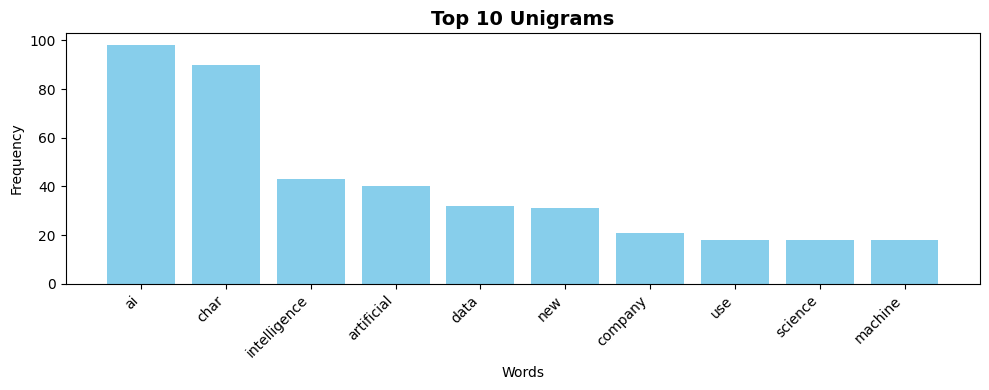

In [ ]:
uni_counts = Counter(unigrams).most_common(10)
labels = [' '.join(u[0]) for u in uni_counts]
values = [u[1] for u in uni_counts]

plt.figure(figsize=(10,4))
plt.bar(labels, values, color='skyblue')
plt.title("Top 10 Unigrams", fontsize=14, fontweight='bold')
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 📈 9. Visualization — Top 10 Bigrams

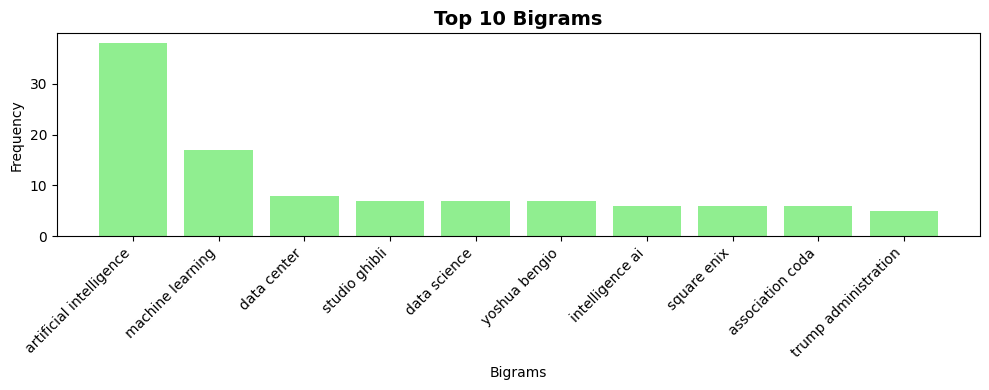

In [ ]:
bi_counts = Counter(bigrams).most_common(10)
labels = [' '.join(b[0]) for b in bi_counts]
values = [b[1] for b in bi_counts]

plt.figure(figsize=(10,4))
plt.bar(labels, values, color='lightgreen')
plt.title("Top 10 Bigrams", fontsize=14, fontweight='bold')
plt.xlabel("Bigrams")
plt.ylabel("Frequency")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 📈 10. Visualization — Top 10 Trigrams

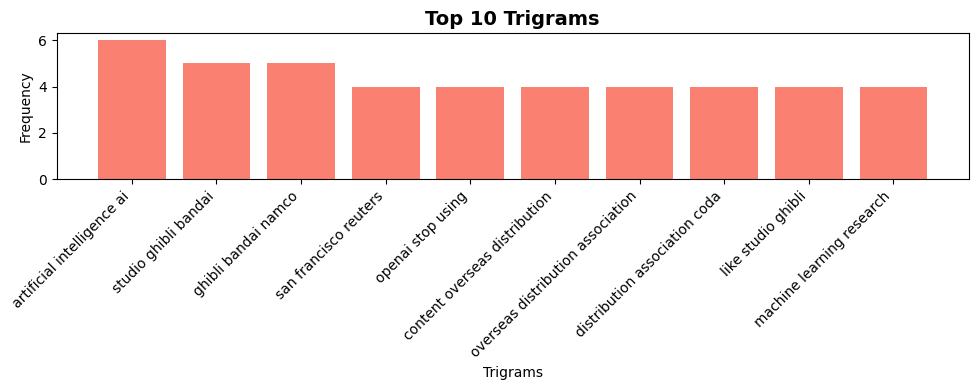


Analysis completed!


In [ ]:
tri_counts = Counter(trigrams).most_common(10)
labels = [' '.join(t[0]) for t in tri_counts]
values = [t[1] for t in tri_counts]

plt.figure(figsize=(10,4))
plt.bar(labels, values, color='salmon')
plt.title("Top 10 Trigrams", fontsize=14, fontweight='bold')
plt.xlabel("Trigrams")
plt.ylabel("Frequency")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("\nAnalysis completed!")